In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

In [12]:
image = mpimg.imread('test.jpg')
type(image), image.shape

(numpy.ndarray, (540, 960, 3))

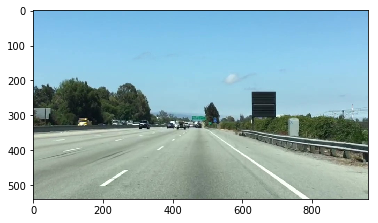

In [13]:
plt.imshow(image)

In [14]:
image[:, :, 0].shape

(540, 960)

In [15]:
image

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ...,

       [[154, 166, 154],
        [156, 168, 156],
        [153, 165, 153],
        ...,
        [180, 197, 181],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [160, 172, 162],
        [152, 164, 154],
        ...,
        [174, 192, 176],
        [175, 193, 177],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ...,
        [161, 179, 163],
        [162, 180, 164],
        [162, 180, 164]]

In [16]:
image[:, :, 0]

array([[122, 122, 123, ..., 123, 123, 123],
       [122, 122, 122, ..., 123, 123, 123],
       [122, 122, 122, ..., 123, 123, 123],
       ...,
       [154, 156, 153, ..., 180, 181, 181],
       [162, 160, 152, ..., 174, 175, 176],
       [156, 148, 137, ..., 161, 162, 162]], dtype=uint8)

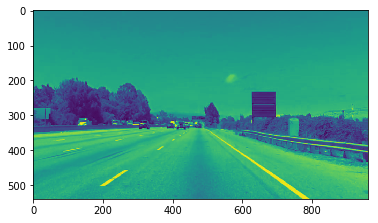

In [17]:
plt.imshow(image[:, :, 0])

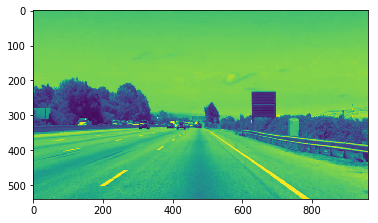

In [18]:
plt.imshow(image[:, :, 1])

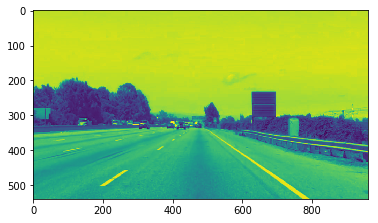

In [19]:
plt.imshow(image[:, :, 2])

In [20]:
ysize = image.shape[0]
xsize = image.shape[1]

### Re-run  from here if changing code below

In [21]:
region_select = np.copy(image)

In [22]:
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

In [23]:
fit_left = np.polyfit([left_bottom[0], apex[0]], [left_bottom[1], apex[1]], 1)
fit_right = np.polyfit([right_bottom[0], apex[0]], [right_bottom[1], apex[1]], 1)
fit_bottom = np.polyfit([left_bottom[0], right_bottom[0]], [left_bottom[1], right_bottom[1]], 1)

In [24]:
fit_left

array([ -1.3475, 539.    ])

In [25]:
fit_right

array([   0.6, -240. ])

In [26]:
fit_bottom

array([-2.65555556e-01,  5.39000000e+02])

In [27]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [28]:
XX.shape, YY.shape

((540, 960), (540, 960))

In [29]:
XX

array([[  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       ...,
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959]])

In [30]:
YY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [537, 537, 537, ..., 537, 537, 537],
       [538, 538, 538, ..., 538, 538, 538],
       [539, 539, 539, ..., 539, 539, 539]])

In [31]:
result = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [32]:
result

[array([[  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        ...,
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [537, 537, 537, ..., 537, 537, 537],
        [538, 538, 538, ..., 538, 538, 538],
        [539, 539, 539, ..., 539, 539, 539]])]

In [33]:
region_thresholds = (
    (YY > (fit_left[0] * XX + fit_left[1])) 
    & (YY < (fit_bottom[0] * XX + fit_bottom[1]))
    & (YY > (fit_right[0] * XX + fit_right[1]))
)
region_thresholds.shape

(540, 960)

In [34]:
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
region_select[region_thresholds] = [255, 0, 0]
region_select

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ...,

       [[154, 166, 154],
        [156, 168, 156],
        [255,   0,   0],
        ...,
        [180, 197, 181],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [174, 192, 176],
        [175, 193, 177],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ...,
        [161, 179, 163],
        [162, 180, 164],
        [162, 180, 164]]

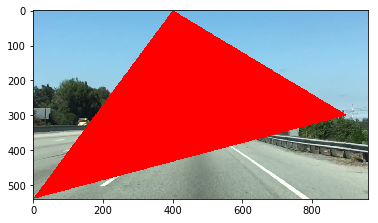

In [36]:
plt.imshow(region_select)